# EDA final
Análisis de la base de datos final, luego de la transformación.

## Carga de las librerias necesarias

In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import numpy as np  # type: ignore
import seaborn as sns  # type: ignore
import ast # type: ignore

## Carga de los archivos de la tablas

In [2]:
atributos = pd.read_csv(r'modelado\atributos.csv')
categorias = pd.read_csv(r'modelado\categorias.csv')
ciudades = pd.read_csv(r'modelado\ciudades.csv')
negocios = pd.read_csv(r'modelado\negocios.csv')
reviews = pd.read_csv(r'modelado\reviews.csv')
negocios_atributos = pd.read_csv(r'modelado\negocios_atributos.csv')
negocios_categorias = pd.read_csv(r'modelado\negocios_categorias.csv')

## **Exploración inicial de las tablas:** *estructura y características principales*

In [3]:
tablas = {
    "atributos": atributos,
    "ciudades": ciudades,
    "negocios": negocios,
    "reviews": reviews,
    "negocios_atributos": negocios_atributos,
    "negocios_categorias": negocios_categorias
}

for nombre, df in tablas.items():
    print(f"\n🔹 Tabla: {nombre}")
    print(df.info())
    print(df.head(3))
    print(df.describe(include="all"))


🔹 Tabla: atributos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   atributo_id  58 non-null     int64 
 1   atributo     58 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None
   atributo_id  atributo
0            1  delivery
1            2   takeout
2            3    dinein
        atributo_id  atributo
count     58.000000        58
unique          NaN        58
top             NaN  delivery
freq            NaN         1
mean      29.500000       NaN
std       16.886879       NaN
min        1.000000       NaN
25%       15.250000       NaN
50%       29.500000       NaN
75%       43.750000       NaN
max       58.000000       NaN

🔹 Tabla: ciudades
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ---

### 📊 Exploración inicial de las tablas: estructura y características principales

#### 🔍 Conclusiones rápidas de la exploración inicial

##### 1️⃣ Tablas bien estructuradas
- Todas las tablas cargaron correctamente sin valores nulos en sus columnas clave (`id`, `city_id`, `atributo_id`, `category_id`).
- La mayoría de los tipos de datos parecen correctos.

##### 2️⃣ Revisión de dimensiones y relaciones
- **`negocios`** es la tabla principal con **26,325 registros**.
- **`reviews`** tiene **751,917 registros**, lo que indica un buen volumen de datos para análisis de sentimiento y calidad de negocios.
- **`ciudades`** contiene **444 registros**, lo que sugiere un análisis en muchas localidades.
- **Tablas intermedias (`negocios_atributos` y `negocios_categorias`)** parecen correctamente estructuradas, permitiendo relaciones entre negocios, categorías y atributos.

## 🔎 Análisis de valores nulos y duplicados  

In [4]:
# Análisis de valores nulos y duplicados en cada tabla
for nombre, df in tablas.items():
    print(f"\n🔹 Tabla: {nombre}")
    
    # Valores nulos
    nulos = df.isnull().sum()
    print("🔍 Valores nulos:")
    print(nulos[nulos > 0])  # Solo mostramos columnas con nulos
    
    # Duplicados
    duplicados = df.duplicated().sum()
    print(f"\n📌 Registros duplicados: {duplicados}")

    print("-" * 50)


🔹 Tabla: atributos
🔍 Valores nulos:
Series([], dtype: int64)

📌 Registros duplicados: 0
--------------------------------------------------

🔹 Tabla: ciudades
🔍 Valores nulos:
Series([], dtype: int64)

📌 Registros duplicados: 0
--------------------------------------------------

🔹 Tabla: negocios
🔍 Valores nulos:
street_address    341
dtype: int64

📌 Registros duplicados: 0
--------------------------------------------------

🔹 Tabla: reviews
🔍 Valores nulos:
Series([], dtype: int64)

📌 Registros duplicados: 15053
--------------------------------------------------

🔹 Tabla: negocios_atributos
🔍 Valores nulos:
Series([], dtype: int64)

📌 Registros duplicados: 0
--------------------------------------------------

🔹 Tabla: negocios_categorias
🔍 Valores nulos:
Series([], dtype: int64)

📌 Registros duplicados: 0
--------------------------------------------------


### 🔍 Conclusiones del análisis de valores nulos y duplicados  

#### 1️⃣ **Valores nulos**  
- ✅ **No hay valores nulos en:** `atributos`, `ciudades`, `reviews`, `negocios_atributos`, `negocios_categorias`.
- ⚠️ **`negocios` tiene 341 valores nulos en `street_address`** (dirección).  
  - 📌 Posible solución: Completar con `"Desconocido"` o dejarlo nulo si no se usa en análisis.
  
#### 2️⃣ **Registros duplicados**  
- ✅ **Sin duplicados en:** `atributos`, `ciudades`, `negocios`, `negocios_atributos`, `negocios_categorias`.
- ⚠️ **`reviews` tiene 15,053 registros duplicados.**  


## 🔗 Análisis de relaciones entre tablas  


In [5]:
# Verificar que todas las claves foráneas tienen correspondencia en la tabla principal

print("🔍 ¿Todas las ciudades en negocios existen en ciudades?")
print(negocios["city_id"].isin(ciudades["city_id"]).value_counts())

print("\n🔍 ¿Todas las reviews tienen un negocio válido?")
print(reviews["id"].isin(negocios["id"]).value_counts())

print("\n🔍 ¿Todas las relaciones en negocios_atributos tienen negocios válidos?")
print(negocios_atributos["id"].isin(negocios["id"]).value_counts())

print("\n🔍 ¿Todas las relaciones en negocios_categorias tienen negocios válidos?")
print(negocios_categorias["id"].isin(negocios["id"]).value_counts())


🔍 ¿Todas las ciudades en negocios existen en ciudades?
city_id
True    26325
Name: count, dtype: int64

🔍 ¿Todas las reviews tienen un negocio válido?
id
True    751917
Name: count, dtype: int64

🔍 ¿Todas las relaciones en negocios_atributos tienen negocios válidos?
id
True    249747
Name: count, dtype: int64

🔍 ¿Todas las relaciones en negocios_categorias tienen negocios válidos?
id
True    36326
Name: count, dtype: int64


### ✅ Conclusiones del análisis de relaciones entre tablas  

#### 1️⃣ **Todas las relaciones son correctas**  
- ✅ **Todos los `city_id` en `negocios` existen en `ciudades`** (ninguna ciudad sin referencia válida).  
- ✅ **Todas las `reviews` tienen un `id` de negocio válido** (no hay reseñas de negocios inexistentes).  
- ✅ **Todos los `id` en `negocios_atributos` y `negocios_categorias` existen en `negocios`**.  

📌 No es necesario hacer correcciones en esta parte, ya que la integridad referencial es perfecta.  

## 📊 Distribución de calificaciones en negocios: análisis de sesgo y tendencias  

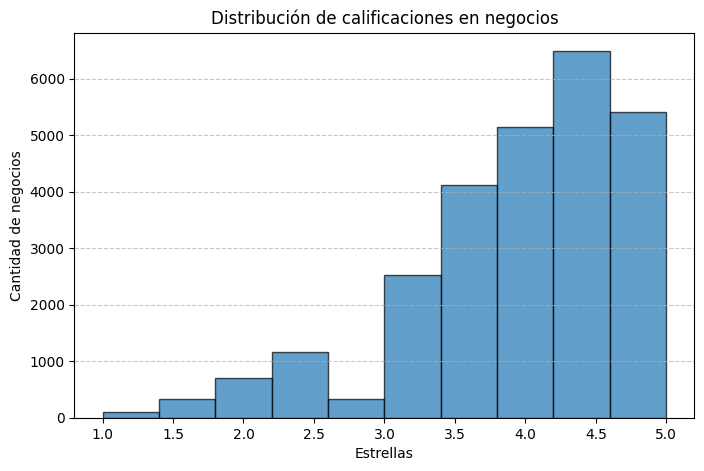

📊 Estadísticas de calificaciones en negocios:
count    26325.000000
mean         3.934344
std          0.792589
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: stars, dtype: float64


In [6]:
# Histograma de calificaciones
plt.figure(figsize=(8,5))
plt.hist(negocios["stars"], bins=10, edgecolor="black", alpha=0.7)
plt.title("Distribución de calificaciones en negocios")
plt.xlabel("Estrellas")
plt.ylabel("Cantidad de negocios")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Estadísticas descriptivas de las calificaciones
print("📊 Estadísticas de calificaciones en negocios:")
print(negocios["stars"].describe())


### 📊 Conclusiones de la distribución de calificaciones en negocios  

#### 1️⃣ **Tendencia general de las calificaciones**  
- 📌 La media de calificaciones es **3.93**, con una desviación estándar de **0.79**.  
- 📌 El **rango de calificaciones** va de **1 a 5 estrellas**.  
- 📌 El **50% de los negocios tiene una calificación de 4 o más**.  

#### 2️⃣ **Sesgo en la distribución**  
- 🚀 **La mayoría de los negocios tiene entre 3.5 y 5 estrellas**.  
- 📌 Se observa una **distribución sesgada a la derecha**, con más negocios con calificaciones altas.  
- ⚠️ **Muy pocos negocios tienen calificaciones entre 1 y 2.5 estrellas**, lo que sugiere que los negocios muy malos podrían haber cerrado o recibir menos reviews.

## 🏙 Distribución de negocios por ciudad: concentración en áreas clave  


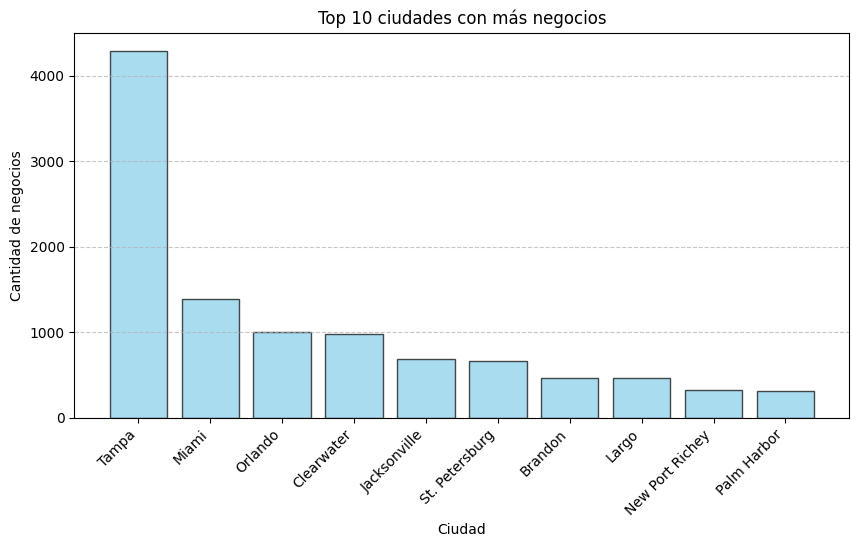

   city_id  count             city  population
0        3   4290            Tampa      403364
1        2   1395            Miami      455924
2        4   1008          Orlando      320742
3       21    979       Clearwater      116850
4        1    688     Jacksonville      985843
5        5    669   St. Petersburg      263553
6       22    467          Brandon      116365
7       40    463            Largo       82248
8      228    326  New Port Richey       17708
9       61    316      Palm Harbor       61454


In [7]:
# Unir con la tabla de ciudades para obtener los nombres
negocios_por_ciudad = negocios["city_id"].value_counts().reset_index()
negocios_por_ciudad.columns = ["city_id", "count"]

# Merge para obtener los nombres
negocios_por_ciudad = negocios_por_ciudad.merge(ciudades, on="city_id", how="left")

# Tomar solo el top 10
top_ciudades = negocios_por_ciudad.head(10)

# Graficar con nombres en el eje X
plt.figure(figsize=(10,5))
plt.bar(top_ciudades["city"], top_ciudades["count"], color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Top 10 ciudades con más negocios")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de negocios")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Mostrar la tabla con nombres de ciudades
print(top_ciudades)

### 🏙 Conclusiones del análisis de negocios por ciudad  

#### 1️⃣ **Ciudades con mayor cantidad de negocios**  
- 📌 **Tampa lidera con 4,290 negocios**, muy por encima del resto.  
- 📌 **Miami, Orlando y Clearwater** tienen entre 1,000 y 1,400 negocios, formando un segundo grupo de alta concentración.  
- 📌 **Las demás ciudades tienen menos de 1,000 negocios**, con un descenso progresivo en cantidad.  

#### 2️⃣ **Relación entre población y cantidad de negocios**  
- 📊 **Jacksonville es la ciudad más poblada (985,843 habitantes) pero tiene menos negocios que Tampa, Miami y Orlando.**  
- 📊 **Tampa, con menos población que Miami y Jacksonville, lidera en cantidad de negocios.**  
- 📌 Esto sugiere que la concentración de negocios no depende únicamente de la población, sino de otros factores como el turismo o la actividad económica.

## ⭐ Distribución de ratings en reviews: análisis de percepción del cliente

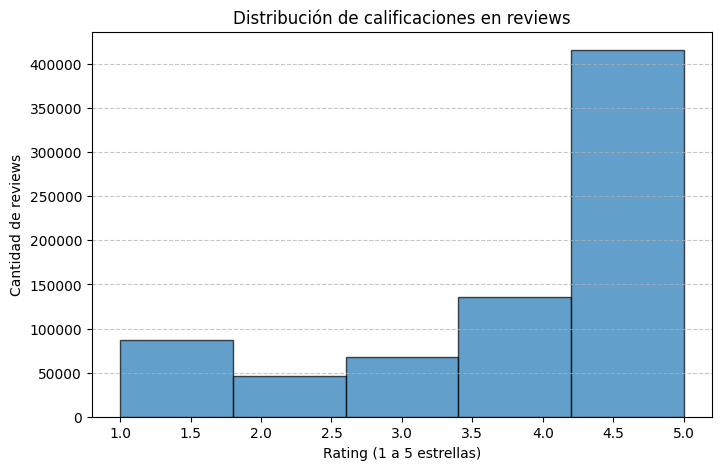

📊 Estadísticas de ratings en reviews:
count    751917.000000
mean          3.994926
std           1.387405
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64


In [8]:
# Histograma de ratings en reviews
plt.figure(figsize=(8,5))
plt.hist(reviews["rating"], bins=5, edgecolor="black", alpha=0.7)
plt.title("Distribución de calificaciones en reviews")
plt.xlabel("Rating (1 a 5 estrellas)")
plt.ylabel("Cantidad de reviews")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Estadísticas descriptivas de los ratings
print("📊 Estadísticas de ratings en reviews:")
print(reviews["rating"].describe())

### ⭐ Conclusiones del análisis de ratings en reviews  

#### 1️⃣ **Distribución de las calificaciones**  
- 📌 La **media de los ratings es 3.99**, lo que indica una percepción **ligeramente positiva en general**.  
- 📌 **El 50% de las reviews tiene una calificación de 5 estrellas**, lo que sugiere que los clientes suelen dejar buenas valoraciones cuando están satisfechos.  
- 📌 **Las calificaciones más bajas (1 estrella) representan una parte importante de los datos**, pero hay pocas en el rango de 2 a 3 estrellas.  

#### 2️⃣ **Sesgo en la distribución**  
- 🚀 **La distribución está polarizada**: la mayoría de las calificaciones son **1 o 5 estrellas**.  
- ⚠️ **Pocas reviews tienen calificaciones intermedias (2-3 estrellas)**, lo que sugiere que los clientes tienden a amar u odiar un negocio en lugar de evaluarlo de manera neutral.

## 📅 Evolución temporal de reviews: tendencias y anomalías  


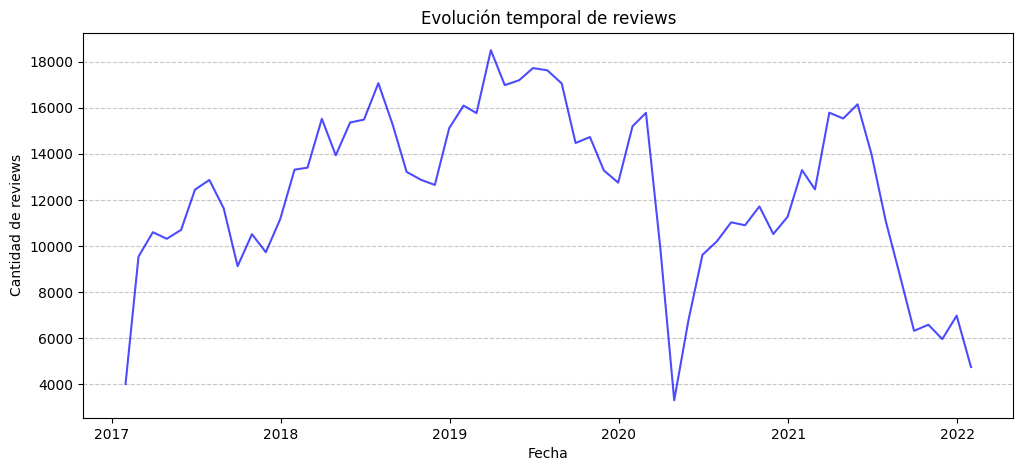

               id  rating  has_text  vader_score  textblob_score
date                                                            
2017-01-31   4016    4016      4016         4016            4016
2017-02-28   9544    9544      9544         9544            9544
2017-03-31  10600   10600     10600        10600           10600
2017-04-30  10314   10314     10314        10314           10314
2017-05-31  10702   10702     10702        10702           10702


In [9]:
# Convertir la columna 'date' a formato datetime si no lo está
reviews["date"] = pd.to_datetime(reviews["date"])

# Contar reviews por mes y año
reviews_por_mes = reviews.resample("ME", on="date").count()

# Graficar la evolución de reviews en el tiempo
plt.figure(figsize=(12,5))
plt.plot(reviews_por_mes.index, reviews_por_mes["id"], color="blue", alpha=0.7)
plt.title("Evolución temporal de reviews")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de reviews")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Mostrar los primeros valores de la serie temporal
print(reviews_por_mes.head())

## 📅 Conclusiones del análisis de evolución temporal de reviews  

### 1️⃣ **Tendencia general**  
- 📌 La cantidad de reviews **aumenta progresivamente desde 2017 hasta finales de 2019**, lo que sugiere un crecimiento en la actividad comercial o en el uso de la plataforma de reseñas.  
- 📌 El **pico máximo se alcanza entre 2019 y principios de 2020**, con más de **18,000 reviews en un solo mes**.  

### 2️⃣ **Disminución drástica en 2020**  
- ⚠️ **A finales de 2019 y principios de 2020 se observa una caída brusca en la cantidad de reviews**.  
- 📌 Esto coincide con la pandemia de **COVID-19**, que afectó a los negocios y redujo la actividad de reseñas.  
- 📊 Posteriormente, hay una **recuperación en 2021**, pero no alcanza los niveles previos a la pandemia.  

## 📈 Evolución de la calificación promedio en el tiempo

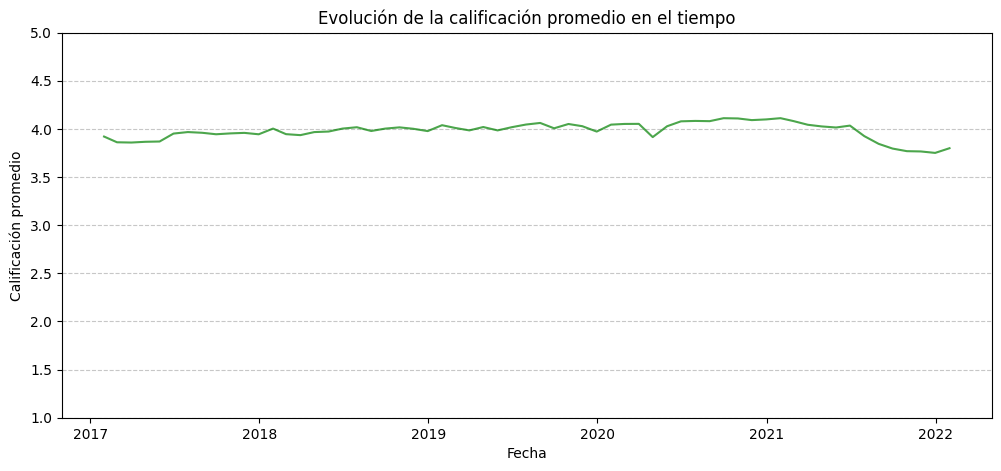

              rating  has_text  vader_score  textblob_score
date                                                       
2017-01-31  3.921315  0.938247     0.605028        0.274966
2017-02-28  3.861693  0.936085     0.588345        0.272171
2017-03-31  3.859057  0.943679     0.589005        0.274808
2017-04-30  3.866783  0.949680     0.607539        0.277709
2017-05-31  3.869837  0.948795     0.608909        0.270839


In [10]:
# Convertir la fecha a formato datetime
reviews["date"] = pd.to_datetime(reviews["date"])

# Convertir la fecha a formato datetime
reviews["date"] = pd.to_datetime(reviews["date"])

# Convertir 'rating' a numérico
reviews["rating"] = pd.to_numeric(reviews["rating"], errors="coerce")

# Eliminar filas con NaN en 'rating'
reviews = reviews.dropna(subset=["rating"])

# Asegurar que rating sea de tipo float
reviews["rating"] = reviews["rating"].astype(float)

# Calcular la calificación promedio por mes
calificacion_por_mes = reviews.resample("ME", on="date").mean(numeric_only=True)

plt.figure(figsize=(12,5))
if not calificacion_por_mes.empty:
    plt.plot(calificacion_por_mes.index, calificacion_por_mes["rating"], color="green", alpha=0.7)
    plt.title("Evolución de la calificación promedio en el tiempo")
    plt.xlabel("Fecha")
    plt.ylabel("Calificación promedio")
    plt.ylim(1, 5)  # Ajustar el eje Y
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
else:
    print("No hay datos válidos para graficar.")

# Mostrar los primeros valores de la serie temporal
print(calificacion_por_mes.head())

### Conclusiones de la evolución de la calificación promedio en el tiempo

#### 1️⃣ **Tendencia general**
- 📌 La calificación promedio se mantiene **estable en torno a 4** durante todo el período analizado.
- 📈 **Ligera caída a finales de 2021 y principios de 2022**, pero sin cambios drásticos.
- 🌟 **Estabilidad general**, lo que indica que los negocios no están teniendo fluctuaciones extremas en su calidad percibida.

#### 2️⃣ **Posibles causas de la caída en 2021-2022**
- ⚠️ La caída podría estar relacionada con **factores externos**, como la pandemia o cambios económicos.
- 📉 **Influencia en la percepción de los usuarios**, aunque no hay datos suficientes para establecer una causa directa.

## 📊 Análisis de la relación entre sentimiento y calificación

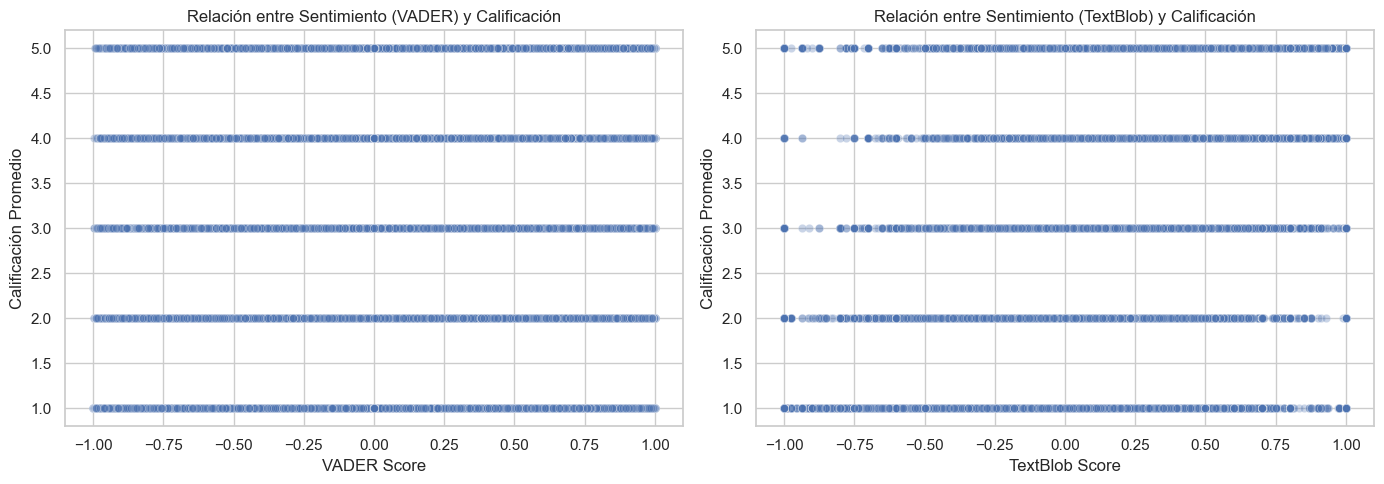

📊 Correlación VADER - Rating: 0.5526
📊 Correlación TextBlob - Rating: 0.5359


In [11]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de dispersión para visualizar la relación entre sentimiento y calificación
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: VADER vs Rating
sns.scatterplot(x=reviews["vader_score"], y=reviews["rating"], alpha=0.3, ax=axes[0])
axes[0].set_title("Relación entre Sentimiento (VADER) y Calificación")
axes[0].set_xlabel("VADER Score")
axes[0].set_ylabel("Calificación Promedio")

# Scatter plot: TextBlob vs Rating
sns.scatterplot(x=reviews["textblob_score"], y=reviews["rating"], alpha=0.3, ax=axes[1])
axes[1].set_title("Relación entre Sentimiento (TextBlob) y Calificación")
axes[1].set_xlabel("TextBlob Score")
axes[1].set_ylabel("Calificación Promedio")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Calcular correlaciones
correlation_vader = reviews["vader_score"].corr(reviews["rating"])
correlation_textblob = reviews["textblob_score"].corr(reviews["rating"])

print(f"📊 Correlación VADER - Rating: {correlation_vader:.4f}")
print(f"📊 Correlación TextBlob - Rating: {correlation_textblob:.4f}")


### 📊 Conclusiones del análisis de la relación entre sentimiento y calificación

#### 1️⃣ **Tendencia general**
- 📌 Se observa una **relación positiva entre el sentimiento del texto y la calificación** en ambas métricas de análisis de sentimiento (**VADER y TextBlob**).  
- 📌 Las calificaciones tienden a agruparse en valores discretos (1 a 5), lo que refleja la escala en la que los usuarios suelen evaluar.

#### 2️⃣ **Correlación entre sentimiento y calificación**
- 🔍 **VADER** muestra una correlación de **0.5526** con la calificación.  
- 🔍 **TextBlob** tiene una correlación de **0.5359** con la calificación.  
- 📈 Ambas correlaciones son **moderadas y positivas**, indicando que los textos con mayor puntaje de sentimiento tienden a estar asociados a **calificaciones más altas**.

## 🏆 Análisis de Atributos más Comunes en Negocios de Alta Calificación  

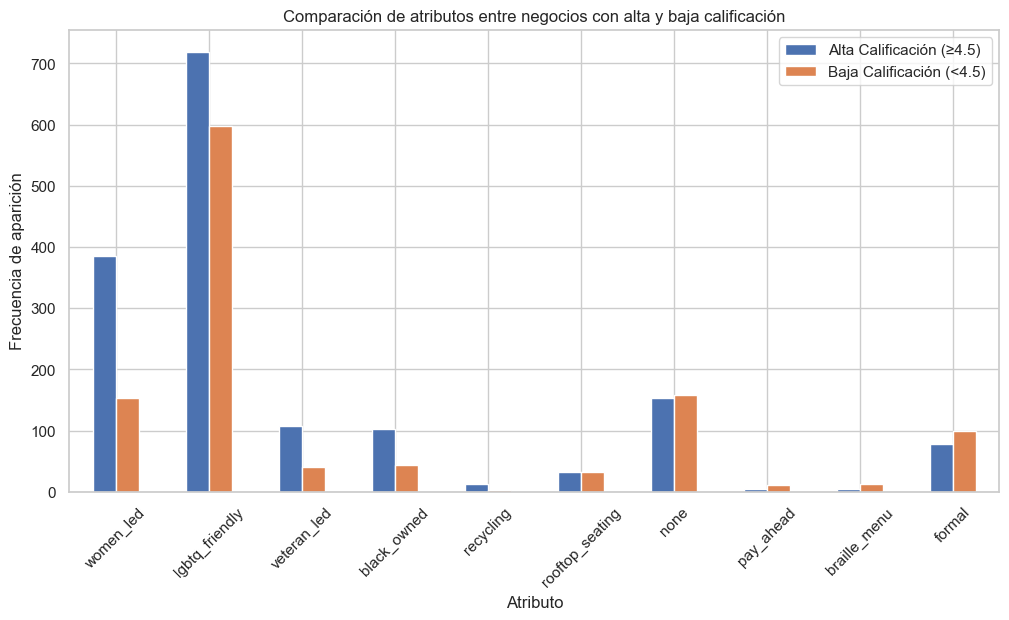

📊 **Top 10 atributos más comunes en negocios con calificación ≥ 4.5:**
    atributo_id  Alta Calificación  Baja Calificación         atributo  \
34           35                386                153        women_led   
38           39                719                597   lgbtq_friendly   
35           36                107                 40      veteran_led   
33           34                102                 44      black_owned   
56           57                 13                  3        recycling   
41           42                 32                 33  rooftop_seating   
57           58                154                158             none   
17           18                  4                 11        pay_ahead   
11           12                  5                 13     braille_menu   
28           29                 78                 99           formal   

    Diferencia  
34         233  
38         122  
35          67  
33          58  
56          10  
41          

In [12]:
# Definir el umbral de alta calificación
umbral_alto = 4.5

# Filtrar negocios con alta calificación y baja calificación
negocios_alta_calif = negocios[negocios["stars"] >= umbral_alto]
negocios_baja_calif = negocios[negocios["stars"] < umbral_alto]

# Filtrar los atributos correspondientes a estos negocios
atributos_alta = negocios_atributos[negocios_atributos["id"].isin(negocios_alta_calif["id"])]
atributos_baja = negocios_atributos[negocios_atributos["id"].isin(negocios_baja_calif["id"])]

# Contar la frecuencia de cada atributo
atributos_alta_count = atributos_alta["atributo_id"].value_counts()
atributos_baja_count = atributos_baja["atributo_id"].value_counts()

# Unir con la tabla de atributos para obtener los nombres
atributos_alta_df = atributos_alta_count.rename("Alta Calificación").reset_index().rename(columns={"index": "atributo_id"})
atributos_baja_df = atributos_baja_count.rename("Baja Calificación").reset_index().rename(columns={"index": "atributo_id"})

# Unir ambas tablas en una comparación
atributos_df = atributos_alta_df.merge(atributos_baja_df, on="atributo_id", how="outer").fillna(0)

# Unir con la tabla de nombres de atributos
atributos_df = atributos_df.merge(atributos, on="atributo_id", how="left")

# Ordenar por la diferencia en frecuencia
atributos_df["Diferencia"] = atributos_df["Alta Calificación"] - atributos_df["Baja Calificación"]
atributos_df = atributos_df.sort_values(by="Diferencia", ascending=False)

# Seleccionar los 10 atributos más diferenciadores
top_atributos = atributos_df.head(10)

# Graficar la comparación
fig, ax = plt.subplots(figsize=(12, 6))
top_atributos.set_index("atributo")[["Alta Calificación", "Baja Calificación"]].plot(kind="bar", ax=ax)
ax.set_title("Comparación de atributos entre negocios con alta y baja calificación")
ax.set_ylabel("Frecuencia de aparición")
ax.set_xlabel("Atributo")
plt.xticks(rotation=45)
plt.legend(["Alta Calificación (≥4.5)", "Baja Calificación (<4.5)"])
plt.show()

# Mostrar los atributos más asociados a altas calificaciones
print("📊 **Top 10 atributos más comunes en negocios con calificación ≥ 4.5:**")
print(top_atributos)


### 🏆 Conclusiones del análisis de Atributos más Comunes en Negocios de Alta Calificación  

#### 1️⃣ **Atributos más diferenciadores en negocios con ≥4.5 estrellas**  
- 🌟 **Negocios liderados por mujeres** (*women_led*) son significativamente más comunes en negocios bien calificados (+233 apariciones).  
- 🏳️‍🌈 **Negocios LGBTQ+ friendly** (*lgbtq_friendly*) también están más presentes en negocios con altas calificaciones (+122).  
- 🎖️ **Negocios liderados por veteranos** (*veteran_led*) muestran una mayor representación en negocios exitosos (+67).  
- ✊ **Negocios de dueños afroamericanos** (*black_owned*) tienen mayor presencia en negocios de alta calificación (+58).  

#### 2️⃣ **Otros atributos con menor impacto**  
- 🔄 **Reciclaje** (*recycling*) aparece levemente más en negocios bien calificados (+10).  
- 🍽️ **Rooftop seating** no muestra diferencia significativa (-1).  
- ❌ **Atributo "none"** aparece en negocios tanto de alta como baja calificación sin una diferencia clara (-4).  

#### 3️⃣ **Atributos más comunes en negocios con menor calificación**  
- 💳 **Pago por adelantado** (*pay_ahead*) es más frecuente en negocios con calificación baja (-7).  
- 📝 **Menús en braille** (*braille_menu*) son más comunes en negocios con menos de 4.5 estrellas (-8).  
- 🎩 **Negocios "formales"** (*formal*) aparecen más en negocios con menor calificación (-21).  

---

📌 **Conclusión:** Los atributos más asociados a negocios con alta calificación parecen estar relacionados con inclusión y diversidad (mujeres, LGBTQ+, afroamericanos, veteranos), mientras que los atributos con mayor presencia en negocios de menor calificación incluyen aspectos más operativos como el pago adelantado o el formato formal.

## 🔍 Identificación de categorías con escasez en ciudades principales  

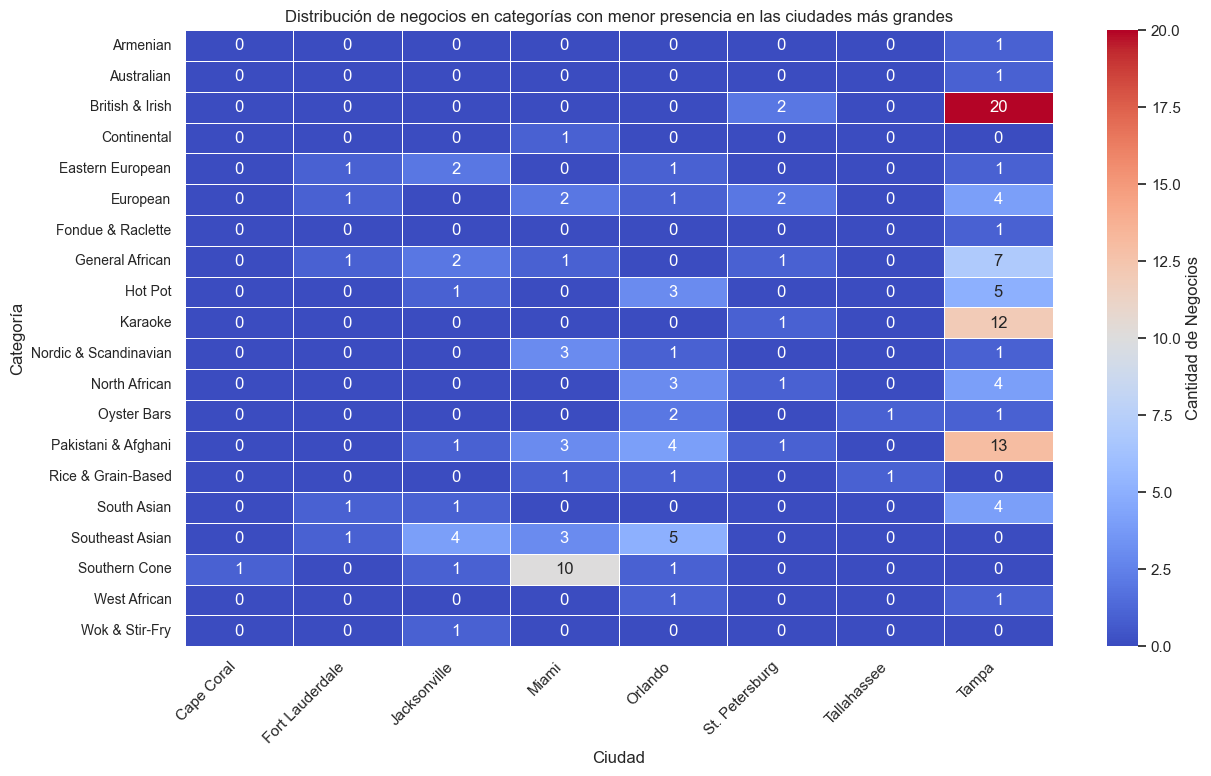

In [13]:
# 📌 Contar la cantidad de negocios por categoría y ciudad
negocios_por_categoria_ciudad = (
    negocios
    .merge(negocios_categorias, on="id")
    .merge(ciudades, on="city_id")
    .merge(categorias, on="category_id")  # Agregamos el nombre de la categoría
    .groupby(["city", "category"])
    .size()
    .reset_index(name="cantidad_negocios")
)

# 📌 Obtener las 10 ciudades con mayor población para el análisis
top_ciudades = ciudades.nlargest(10, "population")["city"]

# 📌 Seleccionar solo las categorías menos representadas a nivel general
categorias_menos_representadas = (
    negocios_por_categoria_ciudad
    .groupby("category")["cantidad_negocios"]
    .sum()
    .nsmallest(20)  # Tomamos las 20 menos representadas en total
    .index
)

# 📌 Filtrar solo las ciudades más grandes y las categorías menos representadas
negocios_top_ciudades = negocios_por_categoria_ciudad[
    (negocios_por_categoria_ciudad["city"].isin(top_ciudades)) &
    (negocios_por_categoria_ciudad["category"].isin(categorias_menos_representadas))
]

# 📌 Crear una tabla pivote para el heatmap
pivot_table = negocios_top_ciudades.pivot_table(
    index="category", columns="city", values="cantidad_negocios", fill_value=0
)

# 📊 Generar el heatmap con mejor legibilidad
plt.figure(figsize=(14, 8))  # Aumentamos el tamaño para mejorar la visibilidad
sns.heatmap(
    pivot_table, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f",
    cbar_kws={'label': 'Cantidad de Negocios'}
)

# 📌 Configuración de etiquetas y título
plt.title("Distribución de negocios en categorías con menor presencia en las ciudades más grandes")
plt.xlabel("Ciudad")
plt.ylabel("Categoría")
plt.xticks(rotation=45, ha="right")  # Girar etiquetas para mejor legibilidad
plt.yticks(fontsize=10)  # Ajustar tamaño de etiquetas para mejor lectura

# 📌 Mostrar el gráfico
plt.show()


### Conclusiones de la identificación de categorías con escasez en ciudades principales  

#### 📊 **Principales hallazgos:**  
1️⃣ **Variabilidad en la escasez de categorías**  
   - Se identificaron **20 categorías con menor presencia** en las 10 ciudades más grandes.  
   - Algunas ciudades tienen **cero presencia** en varias de estas categorías.  

2️⃣ **Categorías con menor representación general**  
   - 🌍 **General African, Nordic & Scandinavian y West African** tienen muy pocos negocios en todas las ciudades.  
   - 🍛 **South Asian y Pakistani & Afghani** muestran **presencia limitada** en la mayoría de las ciudades.  
   - 🍖 **Southern Cone** solo destaca en **Miami (10 negocios)**, con poca representación en otros lugares.  

3️⃣ **Oportunidades de inversión**  
   - 📍 **Tallahassee y St. Petersburg** tienen un número significativamente bajo de negocios en múltiples categorías.  
   - 🍣 **Hot Pot y Karaoke** tienen poca competencia, especialmente en ciudades intermedias.  
   - 🌍 **Cocinas internacionales específicas** (Nordic, West African, Rice & Grain-Based) podrían ser oportunidades en **Miami y Tampa**. 
